In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("iris.data",names = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Target'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#For KNN we dont want bigger numbers for calculations so we are scaling our data
#MinMaxScaler is used for 0 to 1 value and Standard Scaler is used for sTANDARD scaling.Both are suspectible to outliers
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [15]:
New_array = Scaler.fit_transform(df.drop(['Target'],axis=1))
newdf = pd.DataFrame(data=New_array,columns=['A','B','C','D'])
newdf.head()

,A,B,C,D
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [16]:
from sklearn.model_selection import train_test_split

In [40]:
#As Target is Categorical Column so first change it. So i have now 2 Y columns to train on
#Y=pd.get_dummies(df['Target'],drop_first=True)
#No you dont have to change targets into dummies, we can use categorical data for training in KNN
Y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(newdf, Y, test_size=0.30, random_state=101)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
Model = KNeighborsClassifier(n_neighbors=1)

In [43]:
Model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
predictions = Model.predict(X_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print("\n\n\n\n\n")
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]






                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [51]:
'''Now to find best K in KNN use elbow method'''
error_rate=[]

for i in range(1,40):
    Model = KNeighborsClassifier(n_neighbors=i)
    Model.fit(X_train,y_train)
    predictions = Model.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

In [52]:
error_rate 

[0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.0,
 0.0,
 0.0,
 0.022222222222222223,
 0.0,
 0.0,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.1111111111111111,
 0.1111111111111111,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.13333333333333333,
 0.15555555555555556,
 0.13333333333333333,
 0.13333333333333333,
 0.1111111111111111]

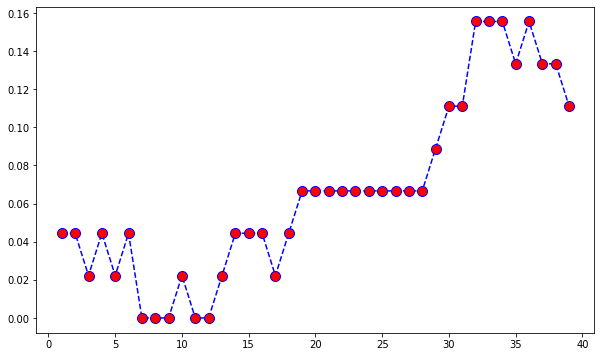

In [61]:
#Linestyle is the way line drwan, marker tells where actually points are in plot
plt.figure(figsize=(10,6)) #To make our graph size bigger
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()

In [62]:
'''So now after seeing figure you know that at K=7 Your error is minimum , nOW TRAIN YOUR MODEL According to it'''
Model = KNeighborsClassifier(n_neighbors=7)
Model.fit(X_train,y_train)
predictions = Model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print("\n\n\n\n\n")
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]






                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

